In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from langdetect import detect
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import json

In [19]:
# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/devasheeshchopra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devasheeshchopra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/devasheeshchopra/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
hindi_stopwords = {
    "और", "का", "है", "में", "की", "से", "को", "पर", "यह", "था", "हैं", "के", "एक", "जो", "तथा",
    "लिए", "तो", "भी", "या", "लेकिन", "नहीं", "सकता", "इस", "हो", "वे", "अपनी", "कर", "रहे", "इसे",
    "वाले", "करना", "किया", "बाद", "होता", "रहा", "कई", "सबसे", "ही", "दो", "जब", "जहां", "उनके", "इन",
    "हम", "तुम", "मुझे", "आप", "इसका", "इनका", "उसके", "तुम्हारे", "उनका", "जैसे", "तक", "बस", "अब",
    "क्या", "क्योंकि", "था", "थी", "थे", "हो", "होती", "होते", "इन्हें", "उन", "यदि", "जैसा", "यही", 
    "थोड़ा", "कुछ", "दूसरे", "इसमें", "उसमें", "कौन", "किस", "जिस", "इसी", "उससे", "जिन्हें", "जिन्हों",
    "तुम्हें", "मेरे", "मेरा", "हमारे", "हमारा", "अपना", "आपका", "उनका", "इनका", "उसका", "उनकी", "इसकी",
    "उसके", "इसके", "किसी", "किसे", "किसका", "हुए", "हुई", "होने", "कैसे", "सभी", "इसके", "इसका", 
    "इससे", "उसका", "उससे", "इन", "उन", "थी", "थे", "रखें", "श्री", "इत्यादि", "किंवदंती", "तुम्हारा",
    "उन्हें", "जिन्हें", "तब", "सब", "इनमें", "उनमें", "वह", "वहाँ", "यहाँ", "किस", "किसी", "किसका",
    "किसके", "किसकी", "जैसे", "जिन्हें", "तुम्हारा", "उनका", "इनका", "उसका", "उनकी", "इसकी", "उन्हें",
    "जिन", "तब", "सब", "इनमें", "उनमें", "जो", "यह", "ये", "वह", "वो", "था", "थी", "थे", "होना",
    "होती", "होते", "करते", "किया", "जिसे", "जिन", "जिन्हें", "जिससे", "जिसका", "जिसकी", "जिसके", 
    "कौन", "किसने", "किसे", "कैसे", "कितना", "कितने", "कौनसा", "कौनसे", "कौनसी", "कहां", "कहाँ",
    "कब", "क्यों", "क्या", "कैसे", "क्योंकि", "व", "तथा", "एवं", "लेकिन", "अतः", "यद्यपि", "फिर",
    "भी", "जबकि", "हालांकि", "चूंकि", "किन्तु", "निस्संदेह", "निश्चित", "अधिक", "कमी", "जहां", "जहाँ",
    "कहने", "चाहिए", "दे", "दो", "ले", "लो", "हूँ", "रहे", "रही", "हूँ", "था", "थी", "थोड़े", "थोड़ा",
    "हो", "होगा", "होगी", "होगे", "होने", "हुआ", "हुई", "हुए", "कभी", "कहीं", "किसी", "किसने", "किससे",
    "कैसा", "कैसे", "कैसी", "कौनसा", "कौनसे", "कौनसी", "वगैरह", "समान", "उस", "इन", "इनका", "उनका",
    "उनके", "कहाँ", "जब", "अगर", "लगभग", "इतना", "इतने", "इन्हें", "उसमें", "किसी", "जिनसे", "जिन्होंने",
}


In [23]:
import string

# Combine punctuation with Hindi stopwords
punctuations = set(string.punctuation)
all_stopwords = hindi_stopwords.union(punctuations)


In [10]:
data = json.load(open('hindi_stories.json'))

In [11]:
# Load data into a DataFrame
df = pd.DataFrame(data)

In [12]:
df.head()

,Genre,Story
0,Animal Stories,"एक ठंडी रात में, चार दोस्त – रिया, अभिषेक, ..."
1,Animal Stories,"एक छोटे से गाँव में, जहाँ घने जंगल थे, रहती थी..."
2,Animal Stories,एक पुरानी हवेली में रहते थे अजीबोगरीब परिवार।...
3,Horror,एक पुरानी हवेली में रहते थे अजीबोगरीब परिवार।...
4,Horror,"एक छोटे से गाँव में, जहाँ ऊँचे-ऊँचे पेड़ों क..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   3720 non-null   object
 1   Story   3720 non-null   object
dtypes: object(2)
memory usage: 58.2+ KB


In [14]:
df.isnull().sum()

Genre    0
Story    0
dtype: int64

In [16]:
df['Language'] = df['Story'].apply(lambda x: detect(x))
print(df['Language'].value_counts())


Language
hi    3720
Name: count, dtype: int64



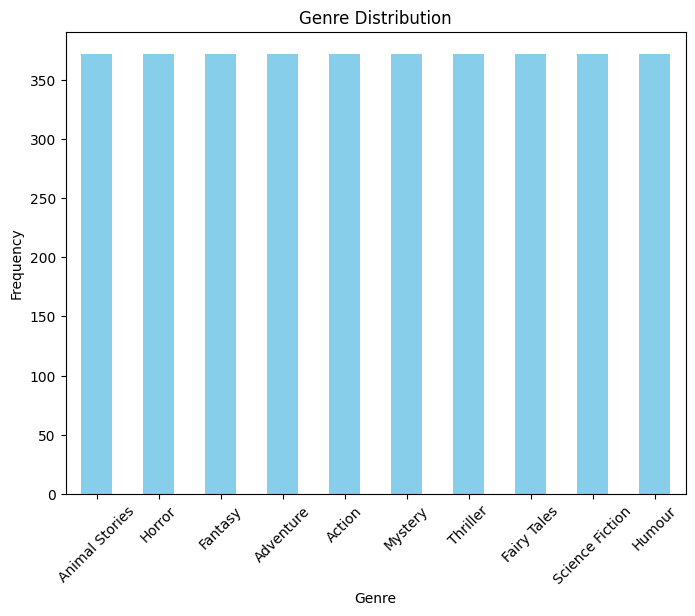

In [17]:
# Distribution of genres
plt.figure(figsize=(8, 6))
df['Genre'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Tokenize and remove stopwords
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in all_stopwords]
    return filtered_tokens

df['Tokens'] = df['Story'].apply(preprocess_text)

In [25]:
# Word frequency analysis
all_words = [word for tokens in df['Tokens'] for word in tokens]
word_freq = Counter(all_words)

# Display top 20 words
print("\nTop 20 Words:")
print(word_freq.most_common(20))


Top 20 Words:
[('ने', 10767), ('चाँद', 4182), ('था।', 3222), ('दिन', 3116), ('बहुत', 2960), ('चाँदनी', 2887), ('कि', 2699), ('उसने', 2331), ('थी।', 2281), ('अपने', 2268), ('उसे', 2260), ('दोस्त', 2178), ('उन्होंने', 2174), ('सा', 2170), ('जंगल', 2167), ('पास', 2085), ('गाँव', 2060), ('सी', 1797), ('गुड़िया', 1790), ('नाम', 1759)]


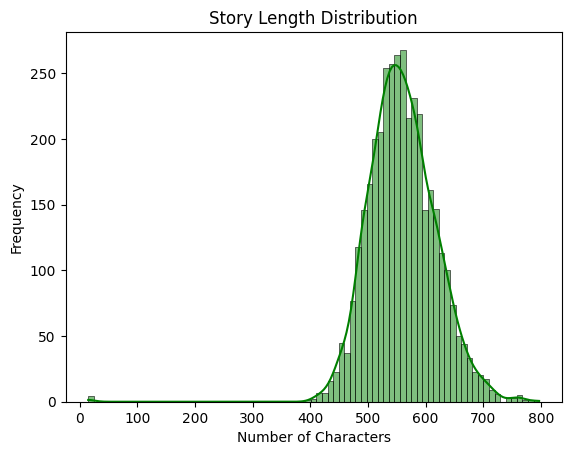

In [28]:
# Story lengths
df['Story Length'] = df['Story'].apply(len)
sns.histplot(df['Story Length'], kde=True, color='green')
plt.title('Story Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

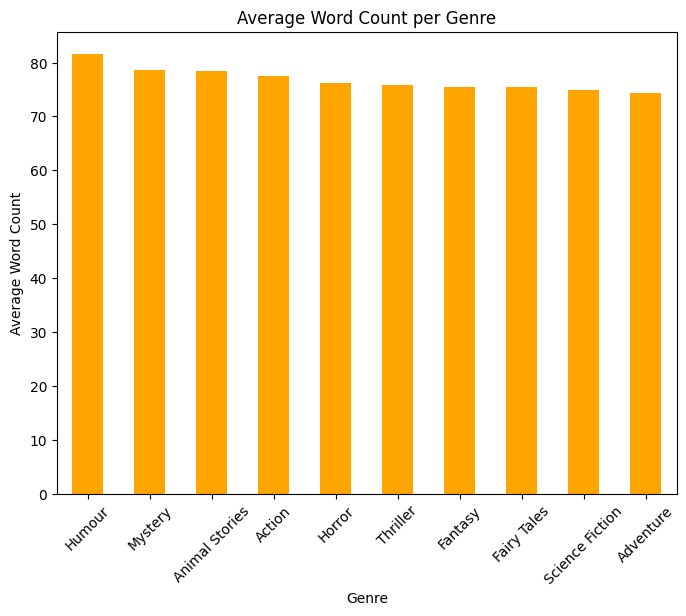

In [29]:
# Average word count per genre
df['Word Count'] = df['Tokens'].apply(len)
avg_word_count = df.groupby('Genre')['Word Count'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
avg_word_count.plot(kind='bar', color='orange')
plt.title('Average Word Count per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Topic Modeling
vectorizer = CountVectorizer(max_df=0.85, min_df=2, stop_words=list(all_stopwords))
X = vectorizer.fit_transform([' '.join(tokens) for tokens in df['Tokens']])
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

/Users/devasheeshchopra/Desktop/StoryScapeApp/storyTime/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['अत', 'अध', 'अपन', 'आपक', 'इत', 'इतन', 'इनक', 'इनम', 'इसक', 'इसम', 'इसस', 'उनक', 'उनम', 'उसक', 'उसम', 'उसस', 'एव', 'कभ', 'कम', 'करत', 'करन', 'कह', 'कहन', 'जबक', 'जह', 'तथ', 'तन', 'नस', 'नह', 'यद', 'यप', 'रख', 'रह', 'वग', 'वद', 'सक', 'सकत', 'सन', 'सबस', 'सभ', 'सम', 'सर', 'सस'] not in stop_words.
  warnings.warn(


LatentDirichletAllocation(n_components=3, random_state=42)

In [33]:
# Display topics
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}:")
    print([terms[i] for i in topic.argsort()[-10:]])

Topic 1:
['उल', 'बन', 'गए', 'उसन', 'अपन', 'पस', 'बड़', 'गय', 'बलर', 'बह']
Topic 2:
['अपन', 'उल', 'पह', 'रत', 'चल', 'गल', 'दर', 'थर', 'खज', 'पत']
Topic 3:
['रत', 'गई', 'उसन', 'गल', 'गय', 'लग', 'बह', 'रहत', 'डर', 'दन']


In [34]:
# Pairwise genre comparison
pairwise_corr = df[['Genre', 'Story Length', 'Word Count']].groupby('Genre').corr()
print("\nPairwise Genre Correlation:")
print(pairwise_corr)


Pairwise Genre Correlation:
                              Story Length  Word Count
Genre                                                 
Action          Story Length      1.000000    0.810325
                Word Count        0.810325    1.000000
Adventure       Story Length      1.000000    0.824864
                Word Count        0.824864    1.000000
Animal Stories  Story Length      1.000000    0.895472
                Word Count        0.895472    1.000000
Fairy Tales     Story Length      1.000000    0.893003
                Word Count        0.893003    1.000000
Fantasy         Story Length      1.000000    0.840078
                Word Count        0.840078    1.000000
Horror          Story Length      1.000000    0.889643
                Word Count        0.889643    1.000000
Humour          Story Length      1.000000    0.865739
                Word Count        0.865739    1.000000
Mystery         Story Length      1.000000    0.760864
                Word Count        0.

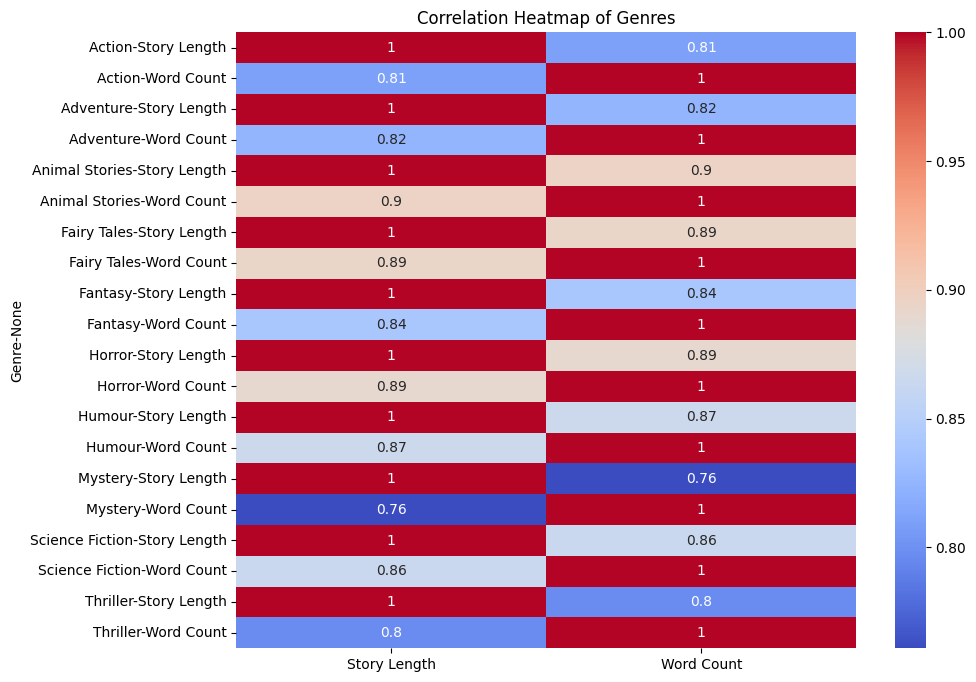

In [35]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Genres')
plt.show()


/var/folders/l_/jb67fzfs7fsbr49l_t_mgn_m0000gn/T/ipykernel_48787/3245877045.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


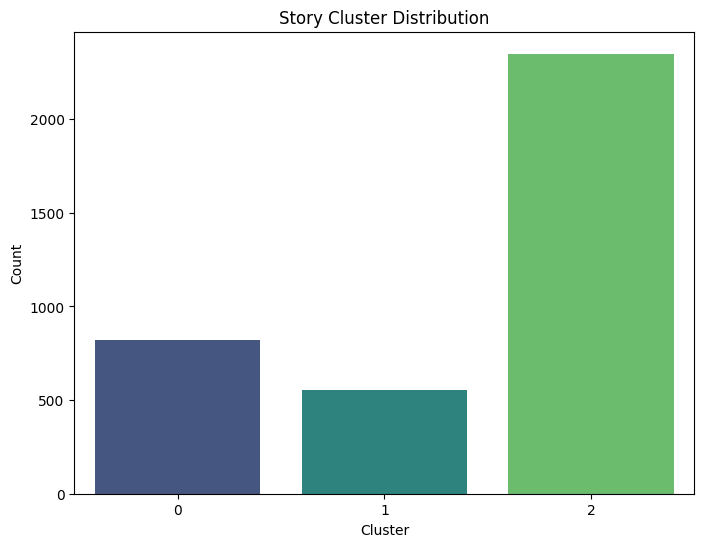

In [37]:
# Clustering with KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

df['Cluster'] = labels

# Cluster analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Story Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [38]:
# TF-IDF Analysis
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words=list(all_stopwords))
X_tfidf = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in df['Tokens']])

/Users/devasheeshchopra/Desktop/StoryScapeApp/storyTime/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['अत', 'अध', 'अपन', 'आपक', 'इत', 'इतन', 'इनक', 'इनम', 'इसक', 'इसम', 'इसस', 'उनक', 'उनम', 'उसक', 'उसम', 'उसस', 'एव', 'कभ', 'कम', 'करत', 'करन', 'कह', 'कहन', 'जबक', 'जह', 'तथ', 'तन', 'नस', 'नह', 'यद', 'यप', 'रख', 'रह', 'वग', 'वद', 'सक', 'सकत', 'सन', 'सबस', 'सभ', 'सम', 'सर', 'सस'] not in stop_words.
  warnings.warn(


In [39]:
# Dimensionality reduction with TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

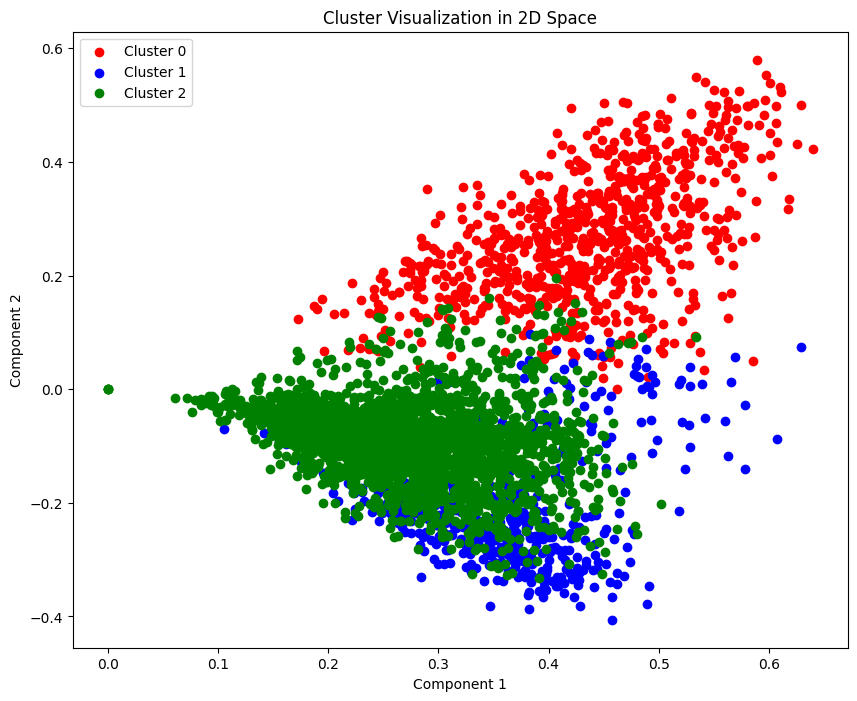

In [40]:
# Plot clusters in 2D space
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
for i in range(num_clusters):
    plt.scatter(X_svd[df['Cluster'] == i, 0], X_svd[df['Cluster'] == i, 1], label=f'Cluster {i}', color=colors[i])
plt.title('Cluster Visualization in 2D Space')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

/Users/devasheeshchopra/Desktop/StoryScapeApp/storyTime/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/devasheeshchopra/Desktop/StoryScapeApp/storyTime/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/devasheeshchopra/Desktop/StoryScapeApp/storyTime/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2330 (\N{DEVANAGARI LETTER CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/devasheeshchopra/Desktop/StoryScapeApp/storyTime/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/devasheeshchopra/Desktop/StoryS

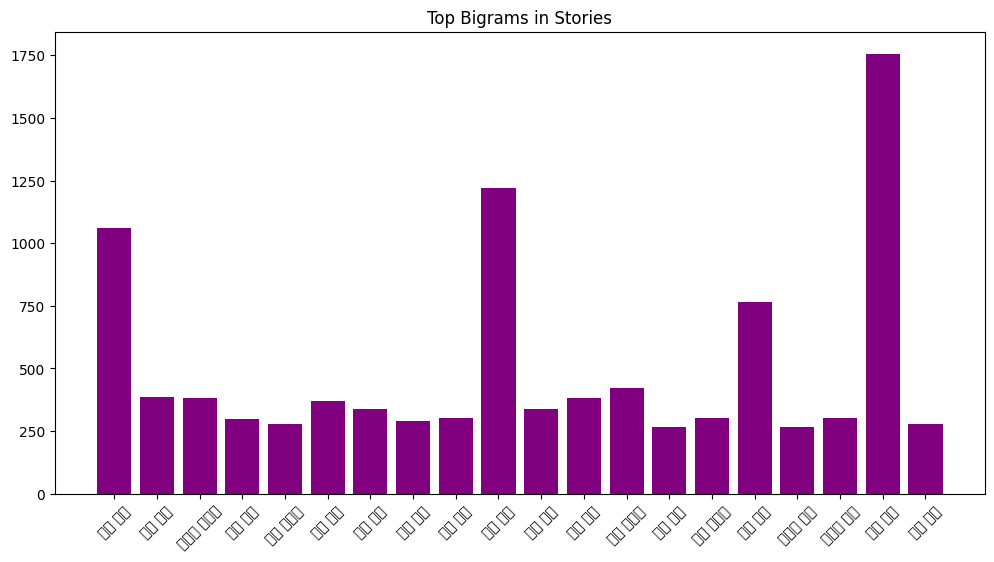

In [41]:
# Bigram and Trigram Analysis
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
bigram_matrix = bigram_vectorizer.fit_transform([' '.join(tokens) for tokens in df['Tokens']])
bigrams = bigram_vectorizer.get_feature_names_out()

bigram_counts = bigram_matrix.sum(axis=0).A1
bigram_freq = dict(zip(bigrams, bigram_counts))

# Plotting top bigrams
plt.figure(figsize=(12, 6))
plt.bar(bigram_freq.keys(), bigram_freq.values(), color='purple')
plt.title('Top Bigrams in Stories')
plt.xticks(rotation=45)
plt.show()


/var/folders/l_/jb67fzfs7fsbr49l_t_mgn_m0000gn/T/ipykernel_48787/2519933264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Story Length', data=df, palette='Set2')


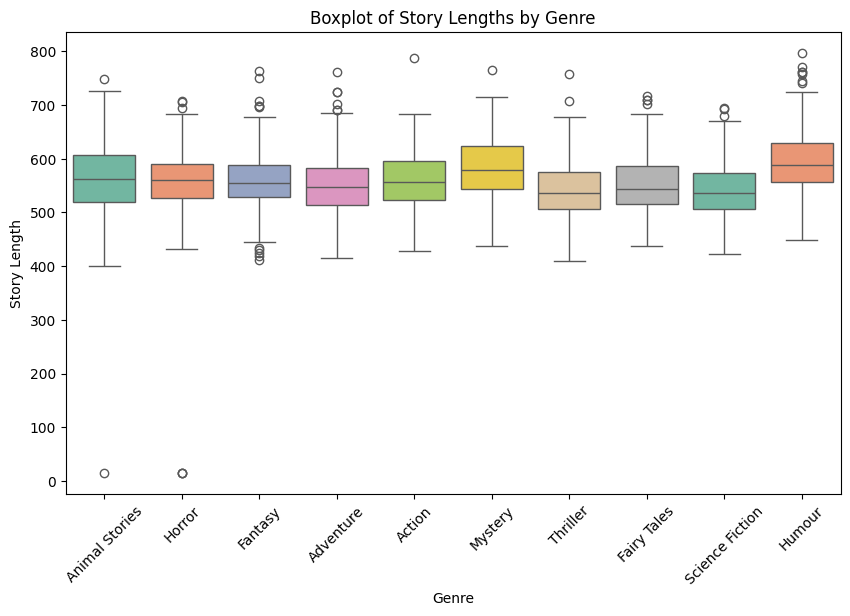

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Story Length', data=df, palette='Set2')
plt.title('Boxplot of Story Lengths by Genre')
plt.xlabel('Genre')
plt.ylabel('Story Length')
plt.xticks(rotation=45)
plt.show()


In [43]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score for KMeans Clustering: {silhouette_avg}")


Silhouette Score for KMeans Clustering: 0.07021220264255926


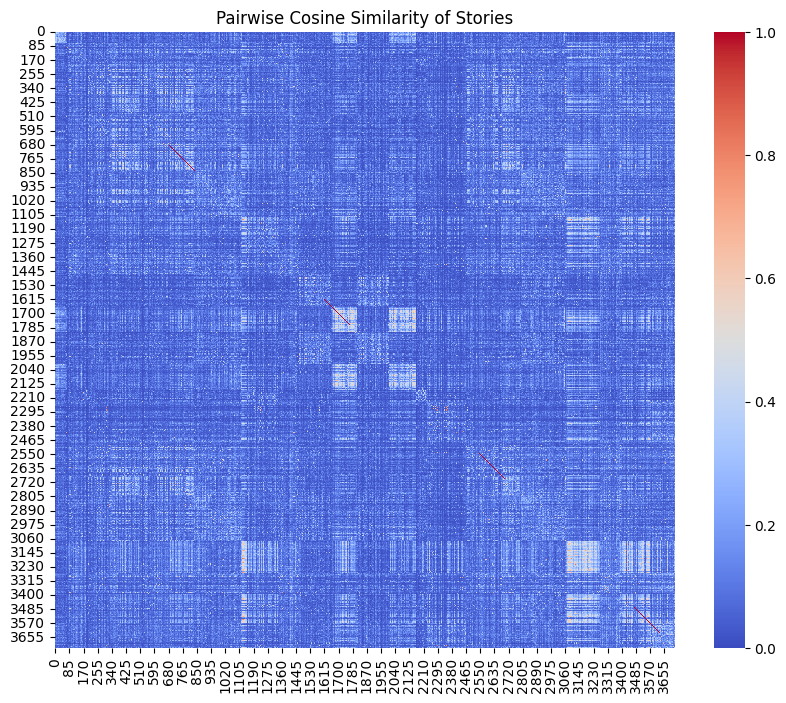

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
cosine_sim = cosine_similarity(X_tfidf)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, cmap='coolwarm')
plt.title('Pairwise Cosine Similarity of Stories')
plt.show()
